# Lecture 3b: Source code for plots from Lecture 3a + introduction to Seaborn and Plotly libraries

[Data Visualization · 1-DAV-105](https://bbrejova.github.io/viz/)

Lecture by Broňa Brejová

This notebook contains the source code for all the plots shown in the first part of the lecture. In also introduces two new plotting libraries: Seaborn and Plotly.

## Seaborn library

* [Seaborn](https://seaborn.pydata.org/tutorial.html) library is an extension of Matplotlib.
* Seaborn is more convenient for many types of plots; we will use it for more complex scatter plots and line plots, for bar plots, strip plots, histograms and heatmaps. 
* In Seabron functions, a whole DataFrame can be added using option `data=`. DataFrame column names are then used as `x`, `y`, `hue` (color), `col` (one of subfigures).
* Seaborn creates Matplotlib objects (e.g. figure, axes) which can be then modified using Matplotlib methods.
* The first example of this library is in section [Categorical variable via color](#Categorical-variable-via-color)

## Plotly library for interactive plots

* Another popular library is [Plotly](https://plotly.com/python/plotly-express/).
* It provides some additional plot types and all plots are interactive. 
* For example, in the [scatter plot](https://plotly.com/python/line-and-scatter/), we can find information about each dot by hovering a mouse over it. 
* We can also zoom into parts of the plot by selecting a rectangle. 
* A menu with additional options appears in the top right corner of the plot.
* Plotly is also used the first time in section [Categorical variable via color](#Categorical-variable-via-color).

## Used libraries 


In [1]:
import numpy as np
import pandas as pd
from IPython.display import Markdown
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

The following library is needed to save figures in Plotly, we install it.

In [2]:
! pip install -U kaleido

Requirement already up-to-date: kaleido in /home/bbrejova/viz/notebooks/venv/lib/python3.8/site-packages (0.2.1)


We also make a folder for storing saved figures.

In [3]:
! mkdir L03b-fig

mkdir: cannot create directory ‘L03b-fig’: File exists


## Importing World Bank data

Country indicators from World Bank, https://databank.worldbank.org/home under CC BY 4.0 license.

Country population, surface area in km squared, GDP per capita (current US$), life expectancy at birth (years), fertility rate (births per woman); in years 2000, 2010, 2018. 

In [4]:
url = 'https://bbrejova.github.io/viz/data/World_bank.csv'
countries = pd.read_csv(url).set_index('Country')
display(countries)

Region         Income Group  \
Country                                                                  
Afghanistan                            South Asia           Low income   
Albania                     Europe & Central Asia  Upper middle income   
Algeria                Middle East & North Africa  Lower middle income   
American Samoa                East Asia & Pacific  Upper middle income   
Andorra                     Europe & Central Asia          High income   
...                                           ...                  ...   
Virgin Islands (U.S.)   Latin America & Caribbean          High income   
West Bank and Gaza     Middle East & North Africa  Lower middle income   
Yemen, Rep.            Middle East & North Africa           Low income   
Zambia                         Sub-Saharan Africa  Lower middle income   
Zimbabwe                       Sub-Saharan Africa  Lower middle income   

                       Population2000  Population2010  Population2018  \
Country                                                                 
Afghanistan                20779953.0      29185507.0      37172386.0   
Albania                     3089027.0       2913021.0       2866376.0   
Algeria                    31042235.0      35977455.0      42228429.0   
American Samoa                57821.0         56079.0         55465.0   
Andorra                       65390.0         84449.0         77006.0   
...                               ...             ...             ...   
Virgin Islands (U.S.)        108642.0        108358.0        106977.0   
West Bank and Gaza          2922153.0       3786161.0       4569087.0   
Yemen, Rep.                17409072.0      23154855.0      28498687.0   
Zambia                     10415944.0      13605984.0      17351822.0   
Zimbabwe                   11881477.0      12697723.0      14439018.0   

                            Area       GDP2000       GDP2010       GDP2018  \
Country                                                                      
Afghanistan             652860.0           NaN    543.303042    493.750418   
Albania                  28750.0   1126.683318   4094.350334   5284.380184   
Algeria                2381740.0   1765.022198   4479.341720   4153.733978   
American Samoa             200.0           NaN  10271.224523  11466.690706   
Andorra                    470.0  21854.246803  40852.666777  41793.055258   
...                          ...           ...           ...           ...   
Virgin Islands (U.S.)      350.0           NaN  40043.190166           NaN   
West Bank and Gaza        6020.0   1476.171850   2557.075624   3562.330943   
Yemen, Rep.             527970.0    554.448633   1334.784845    824.117629   
Zambia                  752610.0    345.689554   1489.459306   1516.390661   
Zimbabwe                390760.0    563.057741    948.331854   1683.740577   

                       Expectancy2000  Expectancy2010  Expectancy2018  \
Country                                                                 
Afghanistan                 55.841000       61.028000       64.486000   
Albania                     73.955000       76.562000       78.458000   
Algeria                     70.640000       74.938000       76.693000   
American Samoa                    NaN             NaN             NaN   
Andorra                           NaN             NaN             NaN   
...                               ...             ...             ...   
Virgin Islands (U.S.)       76.619512       77.965854       79.568293   
West Bank and Gaza          71.022000       72.788000       73.895000   
Yemen, Rep.                 60.683000       65.549000       66.096000   
Zambia                      44.000000       55.655000       63.510000   
Zimbabwe                    44.649000       50.640000       61.195000   

                       Fertility2000  Fertility2010  Fertility2018  
Country                                                             
Afghanistan                

## A simple scatterplot

To create a simple scatterplot, commands from the previous lectures suffice. Note that we divide GDP by 1000 and add this information to the axis title. This makes the axis easier to read.

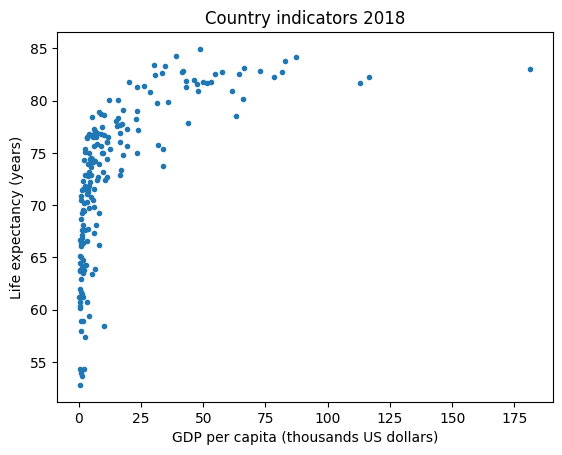

In [5]:
figure, axes = plt.subplots()
axes.plot(countries.GDP2018 / 1000, countries.Expectancy2018, '.')
axes.set_xlabel('GDP per capita (thousands US dollars)')
axes.set_ylabel('Life expectancy (years)')
axes.set_title('Country indicators 2018')
# save figure to a file
figure.savefig('L03b-fig/L03-01.png', bbox_inches='tight')
pass

## Zooming in

Limits on x axis are set using `set_xlim` method in order to zoom in on countries with lower GDP.

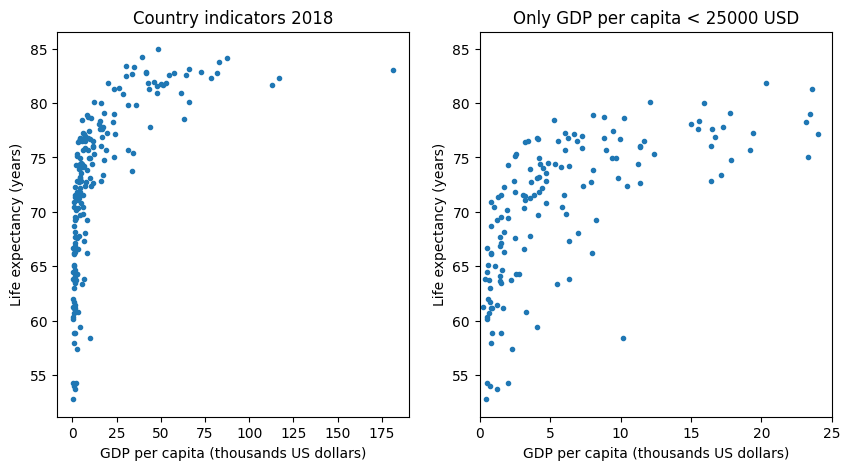

In [6]:
# create two subplots
figure, axes = plt.subplots(1, 2, figsize=(10, 5))

# the left subplot - full range of data
axes[0].plot(countries.GDP2018 / 1000, countries.Expectancy2018, '.')
axes[0].set_xlabel('GDP per capita (thousands US dollars)')
axes[0].set_ylabel('Life expectancy (years)')
axes[0].set_title('Country indicators 2018')

# the right subplot - smaller values of GDP
axes[1].plot(countries.GDP2018 / 1000, countries.Expectancy2018, '.')
axes[1].set_xlabel('GDP per capita (thousands US dollars)')
axes[1].set_ylabel('Life expectancy (years)')
axes[1].set_title('Only GDP per capita < 25000 USD')
axes[1].set_xlim(0, 25)

# save figure to a file
figure.savefig('L03b-fig/L03-02.png', bbox_inches='tight')
pass

## Log-scale plot

In this plot, the log-scale on the x-axis is switched on by `semilogx` method; similarly there is `semilogy` for the y-axis and `loglog` for both axes.

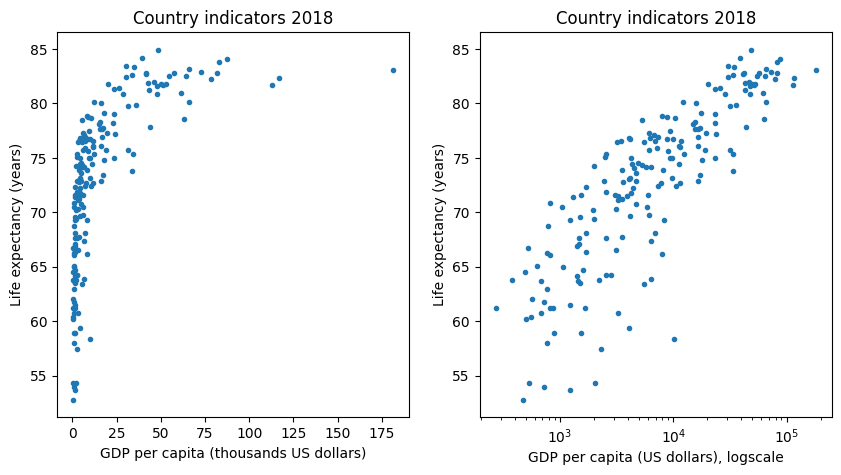

In [7]:
figure, axes = plt.subplots(1, 2, figsize=(10, 5))

# linear scale plot
axes[0].plot(countries.GDP2018 / 1000, countries.Expectancy2018, '.')
axes[0].set_xlabel('GDP per capita (thousands US dollars)')
axes[0].set_ylabel('Life expectancy (years)')
axes[0].set_title('Country indicators 2018')

# log scale plot
axes[1].plot(countries.GDP2018, countries.Expectancy2018, '.')
axes[1].set_xlabel('GDP per capita (US dollars), logscale')
axes[1].set_ylabel('Life expectancy (years)')
axes[1].set_title('Country indicators 2018')
axes[1].semilogx()

figure.savefig('L03b-fig/L03-03.png', bbox_inches='tight')
pass

## Categorical variable via color

Here we color countries by their region. Seaborn function [`scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) can do this easily via `hue` parameter. This function returns Matplotlib axes which can be then modified by familiar methods such as `set_xlabel`. 

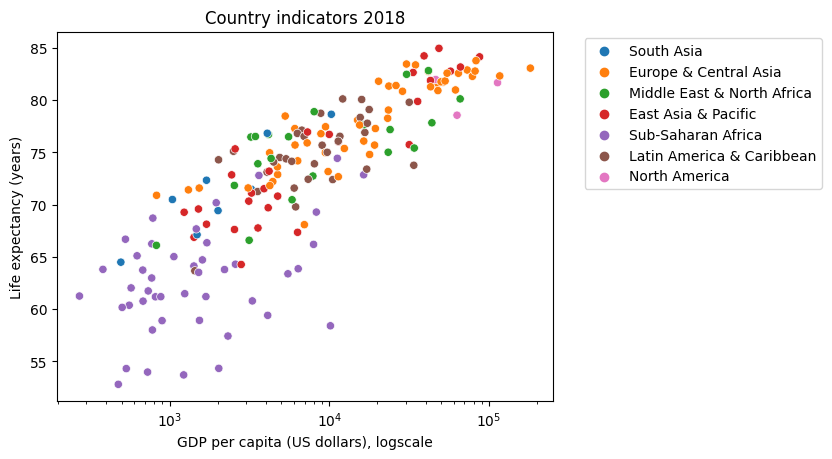

In [8]:
# create plot using Seaborn
axes = sns.scatterplot(data=countries, x='GDP2018', y='Expectancy2018', 
                       hue='Region')
# set plot properties using methods from Matplotlib
axes.set_xlabel('GDP per capita (US dollars), logscale')
axes.set_ylabel('Life expectancy (years)')
axes.set_title('Country indicators 2018')
axes.semilogx()
# place legend outside the plot:
axes.legend(bbox_to_anchor=(1.05, 1), loc=2)

axes.figure.savefig('L03b-fig/L03-04.png', bbox_inches='tight')
pass

* The same plot in Plotly is even easier and interactive. 
* Both Plotly and Seaborn automatically label axes with column names, such as `GDP2018`.
* Here we override such automated labels with longer ones using a dictionary `fig_labels`.

In [9]:
# we want to use index (country name) in the figure for tooltip info
# therefore we create a temporary table with column Country instead of index
temp_table = countries.reset_index()
# how to rename automated axis labels
fig_labels = {'GDP2018':'GDP per capita (US dollars), logscale',
             'Expectancy2018':'Life expectancy (years)'}
# create Plotly plot, add countyr name to tooltip data 
fig = px.scatter(data_frame=temp_table, 
                 x="GDP2018", y="Expectancy2018", color="Region", 
                 hover_data=['Country'], log_x=True,
                 labels = fig_labels)
fig.show()

## Numerical variable via color

Seaborn automatically detects if the column used as `hue` is a categorical or numerical variable. In the previous graph, regions were used as `hue` and Seaborn chose a color palette with a different color for each category. Here we have a numerical variable so a continuous palette with different shades of pink and purple is used by default. We will discuss color palettes later in the course.

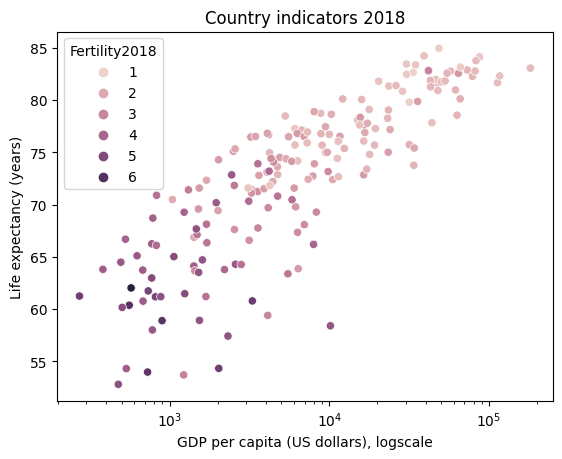

In [10]:
axes = sns.scatterplot(data=countries, x='GDP2018', y='Expectancy2018', 
                       hue='Fertility2018')
axes.set_xlabel('GDP per capita (US dollars), logscale')
axes.set_ylabel('Life expectancy (years)')
axes.set_title('Country indicators 2018')
axes.semilogx()
axes.figure.savefig('L03b-fig/L03-05.png', bbox_inches='tight')

## Numerical variable as point size

We will now use the population of each country as the size of each point (also called bubble), and we will color countries by regions. Sizing points according to the values in a specified table column is again simple to do in Seaborn using paremeter `size` in [`sns.scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html). Parameter `sizes` sets the minimum and maximum point size to be used. For simplicity, population in millions is added as a new column to `countries`. 

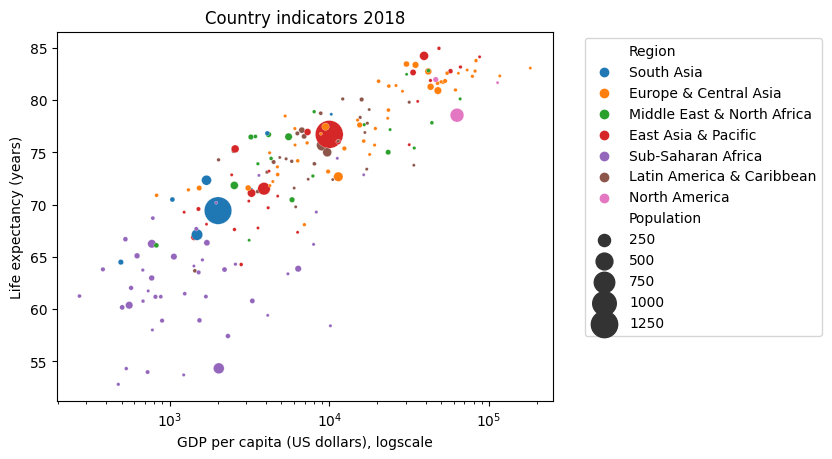

In [11]:
# add a column representing population in millions to table countries
countries['Population'] = countries['Population2018'] / 1e6
# create the plot
axes = sns.scatterplot(data=countries, 
                       x='GDP2018', y='Expectancy2018', hue='Region', size='Population', 
                       sizes=(5, 400))
# set various plot properties
axes.set_xlabel('GDP per capita (US dollars), logscale')
axes.set_ylabel('Life expectancy (years)')
axes.set_title('Country indicators 2018')
axes.semilogx()
axes.legend(bbox_to_anchor=(1.05, 1), loc=2)

axes.figure.savefig('L03b-fig/L03-06.png', bbox_inches='tight')
pass

## Categorical variable as marker type

* We add a new column named `Population change` with categories `increase`, `decrease` and `same` depedning on how the population of a country changed between 2010 and 2018. Category `same` is applied to countries with population change less then 1% in either direction.
* This column is created using `apply` command, which applies a function (here a [lambda expression](https://docs.python.org/3/howto/functional.html#small-functions-and-the-lambda-expression)) to `diff` Series containing relative change in population.
* This column is then used as argument `style` in [`sns.scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html). Size of markers is set to 100 (more than default) by argument `s`. Particular markers are selected by `markers` argument.
* Note that in the `scatterplot` we use both columns of `countries` table and separate Series.

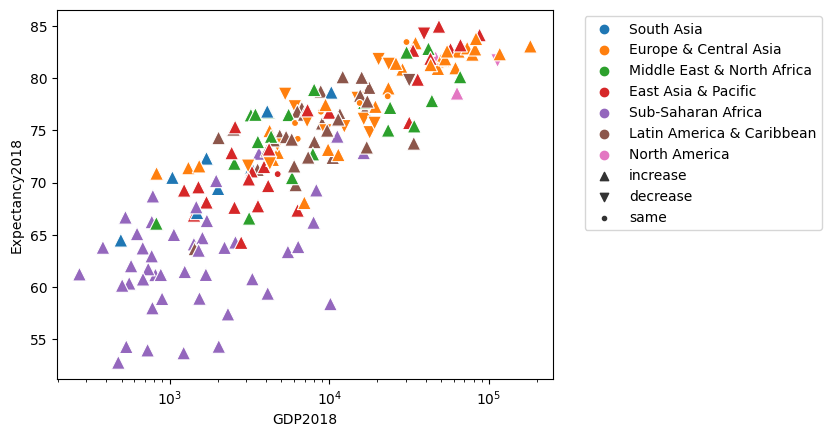

In [12]:
# compute relative differences in population between years 2010 and 2018
diff = (countries.Population2018 - countries.Population2010) / countries.Population2010
# new series with values 'increase', 'decrease' and 'same'
diff_class = diff.apply(lambda x : 'decrease' if x < -0.01 
                        else 'increase' if x > 0.01 else 'same')

# create plot
axes = sns.scatterplot(data=countries, 
                       x='GDP2018', y='Expectancy2018', hue='Region', 
                       style=diff_class, s=100,
                       markers={'increase':'^', 'decrease':'v', 'same':'.'})
# plot settings
axes.semilogx()
axes.legend(bbox_to_anchor=(1.05, 1), loc=2)

axes.figure.savefig('L03b-fig/L03-07.png', bbox_inches='tight')

## Importing Gapminder life expectancy

We import life expectancy data provided free by the [Gapminder foundation](https://www.gapminder.org/data/) under the CC-BY license. The data set gives for each year and each country an estimate of how may years would newborn babies live on average if the trends in mortality of different age groups that were prevailing in the year of their birth would prevail through their entire life. 

In [13]:
url="https://bbrejova.github.io/viz/data/I01-t3-gapminder_life_expectancy_years.csv"
life_exp = pd.read_csv(url, index_col=0)
display(life_exp)

1900  1901  1902  1903  1904  1905  1906  1907  1908  \
country                                                                     
Afghanistan          29.4  29.5  29.5  29.6  29.7  29.7  29.8  29.9  29.9   
Albania              35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4   
Algeria              30.2  30.3  30.4  31.4  25.4  28.1  29.6  29.5  29.5   
Angola               29.0  29.1  29.2  29.3  29.3  29.4  29.4  29.5  29.6   
Antigua and Barbuda  33.8  33.8  33.8  33.8  33.8  33.8  33.8  33.8  33.8   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
Venezuela            32.4  32.4  32.4  32.4  32.4  32.4  32.5  32.5  32.5   
Vietnam              31.2  31.1  31.1  31.1  31.1  31.0  31.0  31.0  30.9   
Yemen                23.5  23.5  23.5  23.5  23.5  23.6  23.6  23.6  23.6   
Zambia               33.6  33.6  33.6  33.7  33.7  33.8  33.8  33.8  33.9   
Zimbabwe             34.1  34.1  34.1  34.1  34.1  34.1  34.1  34.1  34.2   

                     1909  ...  2012  2013  2014  2015  2016  2017  2018  \
country                    ...                                             
Afghanistan          30.0  ...  60.8  61.3  61.2  61.2  61.2  63.4  63.7   
Albania              35.4  ...  77.8  77.9  77.9  78.0  78.1  78.2  78.3   
Algeria              31.0  ...  76.8  76.9  77.0  77.1  77.4  77.7  77.9   
Angola               29.7  ...  61.3  61.9  62.8  63.3  63.8  64.2  64.6   
Antigua and Barbuda  33.8  ...  76.7  76.8  76.8  76.9  77.0  77.0  77.2   
...                   ...  ...   ...   ...   ...   ...   ...   ...   ...   
Venezuela            32.5  ...  75.2  75.2  75.0  75.0  75.3  75.3  75.2   
Vietnam              30.9  ...  73.8  74.0  74.1  74.3  74.4  74.5  74.6   
Yemen                23.6  ...  68.3  68.9  69.0  68.6  68.1  68.1  68.1   
Zambia               33.9  ...  58.8  60.0  61.1  62.0  62.8  63.2  63.7   
Zimbabwe             34.2  ...  54.9  56.8  58.5  59.6  60.5  61.4  61.7   

                     2019  2020  2021  
country                                
Afghanistan          64.1  64.4  64.7  
Albania              78.5  78.6  78.7  
Algeria              78.1  78.3  78.5  
Angola               65.0  65.4  65.7  
Antigua and Barbuda  77.3  77.4  77.5  
...                   ...   ...   ...  
Venezuela            75.1  75.1  75.2  
Vietnam              74.7  74.8  74.9  
Yemen                68.1  68.2  68.3  
Zambia               64.0  64.3  64.6  
Zimbabwe             62.0  62.3  62.5  

[184 rows x 122 columns]

## A simple line graph

Here we use `plot` from matplotlib to plot life expectancy over the years for Slovakia. Years are column names which need to be converted from string to integer using Python list comprehension.

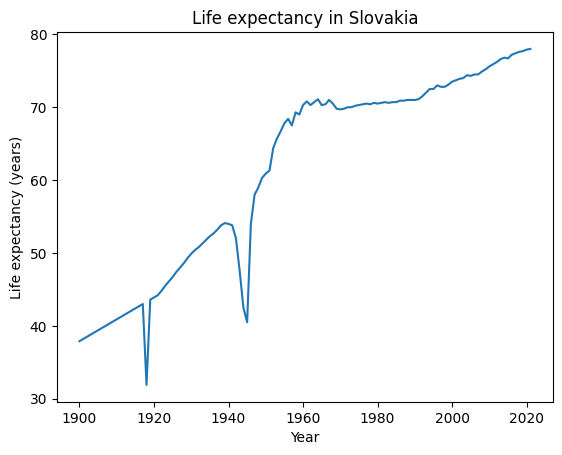

In [14]:
# list of numerical years from column names
years = [int(x) for x in life_exp.columns]
# simple plot for one row of the table
figure, axes = plt.subplots()
axes.plot(years, life_exp.loc['Slovak Republic'])
# plot settings
axes.set_xlabel('Year')
axes.set_ylabel('Life expectancy (years)')
axes.set_title('Life expectancy in Slovakia')

figure.savefig('L03b-fig/L03-08.png', bbox_inches='tight')
pass

## A line graph with multiple lines

Here we plot two lines, each by a separate call to `plot`. Each line has a label to show in the legend.

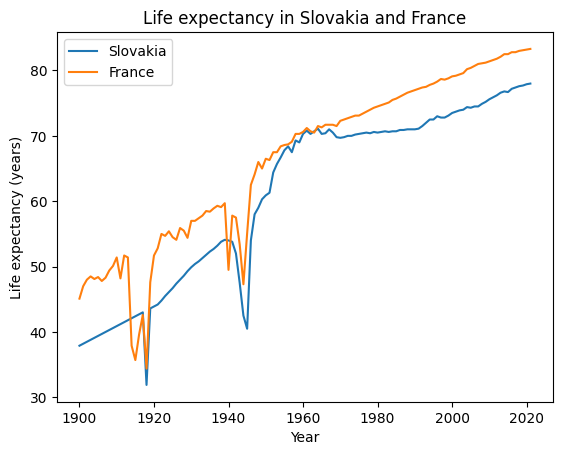

In [15]:
figure, axes = plt.subplots()
# liot two lines
axes.plot(years, life_exp.loc['Slovak Republic'], label='Slovakia')
axes.plot(years, life_exp.loc['France'], label='France')
# plot settings
axes.set_xlabel('Year')
axes.set_ylabel('Life expectancy (years)')
axes.set_title('Life expectancy in Slovakia and France')
axes.legend()

figure.savefig('L03b-fig/L03-09.png', bbox_inches='tight')
pass

## Area graph

Here we fill in the area between x-axis (value 0) and a table row using [`fill_between`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html) method. France is plotted on top and is set to be semi-transparent using `alpha=0.5`.

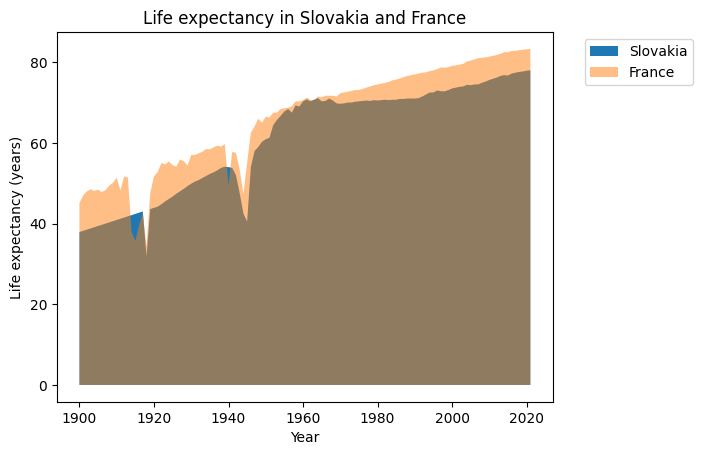

In [16]:
figure, axes = plt.subplots()
# two filled areas, the second is semi-transparent
axes.fill_between(years, 0, life_exp.loc['Slovak Republic'], label='Slovakia')
axes.fill_between(years, 0, life_exp.loc['France'], label='France', alpha=0.5)
# plot settings
axes.set_xlabel('Year')
axes.set_ylabel('Life expectancy (years)')
axes.set_title('Life expectancy in Slovakia and France')
axes.legend(bbox_to_anchor=(1.05, 1), loc=2)

figure.savefig('L03b-fig/L03-10.png', bbox_inches='tight')
pass

## Line graph with many lines

* Here we want to plot lines for all countries starting with 'S' and having at least million inhabitants.
* First we select such countries from `countries` to  table `selection`. 
* Using `intersection`, we get only countries from our selection that are also in Gapminder table (`life_exp`).

In [17]:
s_countries_bool = countries.reset_index()['Country'].str.startswith('S').set_axis(countries.index)
selection = countries.loc[s_countries_bool, :].query('Population2018 > 1e6')
# Syrian Arab Republic not present as row in life_exp, omit
life_exp_sel = life_exp.loc[life_exp.index.intersection(selection.index),:]
display(selection.shape)
display(life_exp_sel.shape)

(16, 16)

(15, 122)

* In Matplotlib, each country from `life_exp_sel` is plotted separately in a for-loop, similarly as for two countries above.
* Note that colors repeat because the default palette is not large enough.

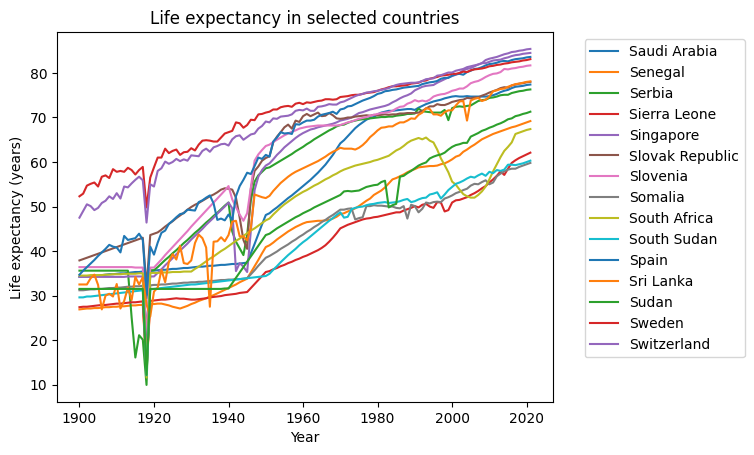

In [18]:
figure, axes = plt.subplots()
# loop over countries
for country in life_exp_sel.index:
    axes.plot(years, life_exp_sel.loc[country], label=country)
    
# plot settings
axes.set_xlabel('Year')
axes.set_ylabel('Life expectancy (years)')
axes.set_title('Life expectancy in selected countries')
axes.legend(bbox_to_anchor=(1.05, 1), loc=2)

figure.savefig('L03b-fig/L03-11.png', bbox_inches='tight')
pass

* To use Seaborn for the same plot, it is better to change `life_exp_sel` table from wide to long format using  `melt` method. Year is converted from strings to integers.
* This creates a table with columns Country, Year, Expectancy.

In [19]:
life_exp_sel_long = (life_exp_sel.reset_index()
  .melt(id_vars=['index'])
  .rename(columns={'index':'Country', 'variable':'Year', 'value':'Expectancy'})
  .astype({'Year':'int32'}))
display(life_exp_sel_long)

Country  Year  Expectancy
0     Saudi Arabia  1900        34.2
1          Senegal  1900        26.9
2           Serbia  1900        35.6
3     Sierra Leone  1900        27.4
4        Singapore  1900        34.2
...            ...   ...         ...
1825         Spain  2021        83.6
1826     Sri Lanka  2021        78.1
1827         Sudan  2021        71.3
1828        Sweden  2021        83.1
1829   Switzerland  2021        84.5

[1830 rows x 3 columns]

* Now we use Seaborn function [`relplot`](https://seaborn.pydata.org/generated/seaborn.relplot.html), setting parameters `x`, `y` and `hue` to column names in our long table and specifying that we want lineplit using `kind="line"`. 
* The function returns `FacetGrid`, which potentially contains multiple axes, so we ned to use slightly different methods to set labels.
* Seaborn created a sufficiently large color palette but some colors are then hard to distinguish.

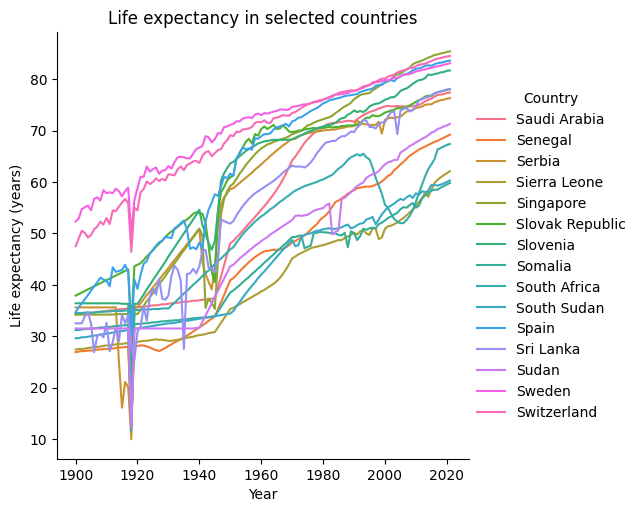

In [20]:
grid = sns.relplot(data=life_exp_sel_long, x='Year', y='Expectancy', 
                   hue='Country', kind="line")
grid.set_axis_labels('Year', 'Life expectancy (years)')
grid.set(title='Life expectancy in selected countries')
grid.savefig('L03b-fig/L03-12.png', bbox_inches='tight')
pass

## Small multiples

* Small multiples, with each country in our selection as a separate plot, is very easy to do in Seaborn from a long-format table using `relplot`, using column `Country` in option `col` which selects one of subplots for each data point.
* Option `col_wrap` selects how many subplots will be placed ion one row of the overall figure.

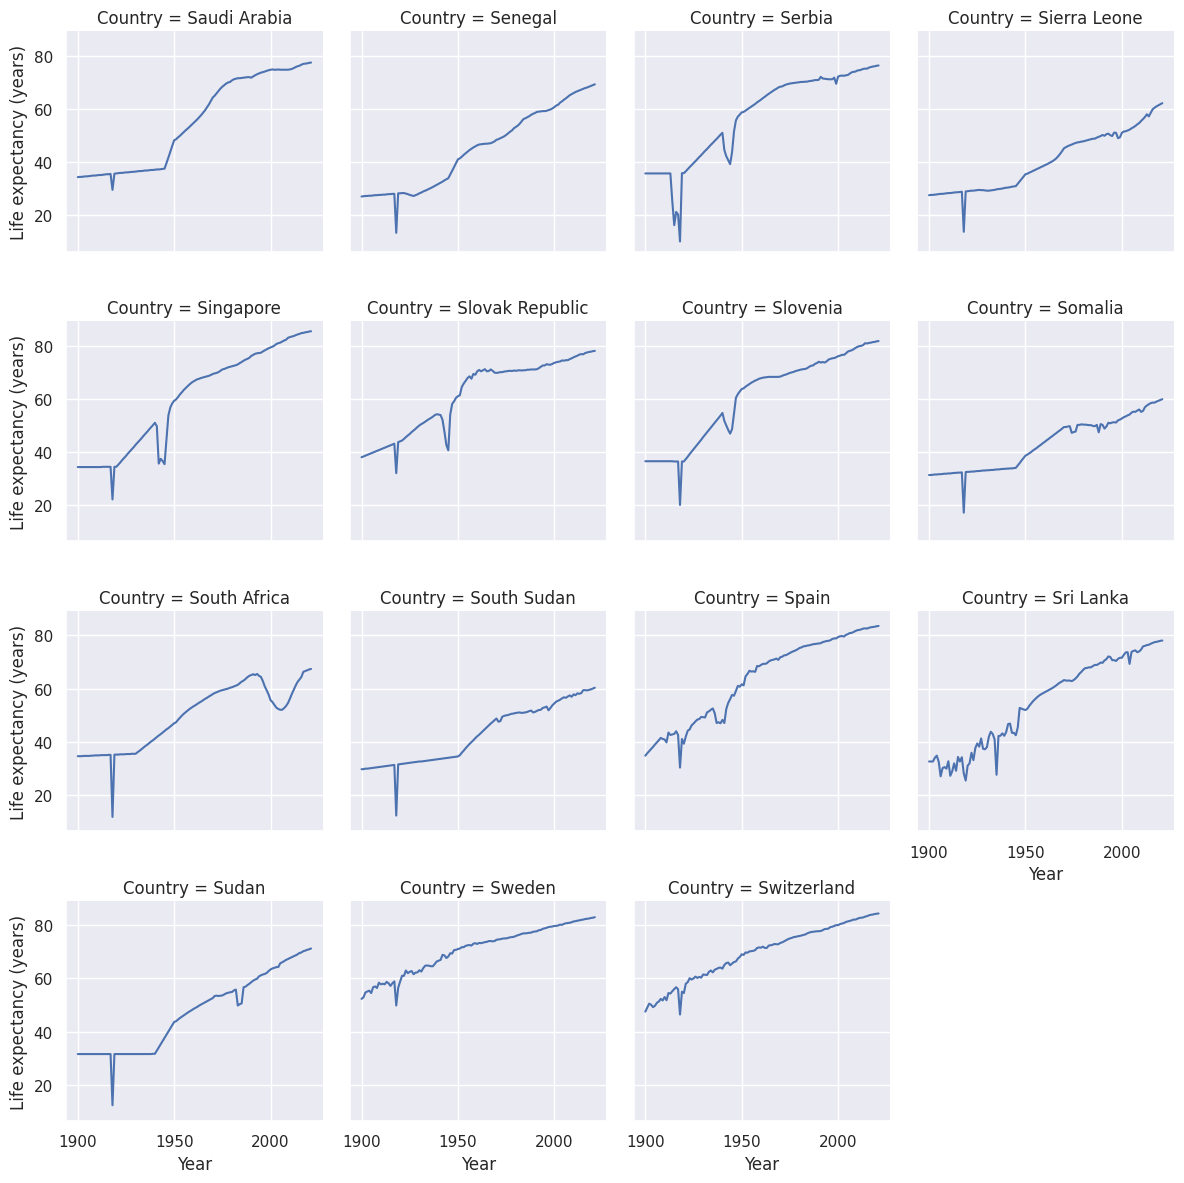

In [21]:
# create grid of small multiple plots
sns.set(font_scale = 1)
grid = sns.relplot(data=life_exp_sel_long, 
                   x='Year', y='Expectancy', col='Country', 
                   col_wrap=4, kind="line", height=3, aspect=1)

grid.set_axis_labels('Year', 'Life expectancy (years)')
grid.savefig('L03b-fig/L03-13.png', bbox_inches='tight')
pass

## Bar graph

* We plot a bargraph of life expectancy in our selected countries by Seaborn function [`barplot`](https://seaborn.pydata.org/generated/seaborn.barplot.html).
* All bars are plotted by the same color using setting `color="C0"`.
* We rotate tick labels on the x axes to fit them in the given space.

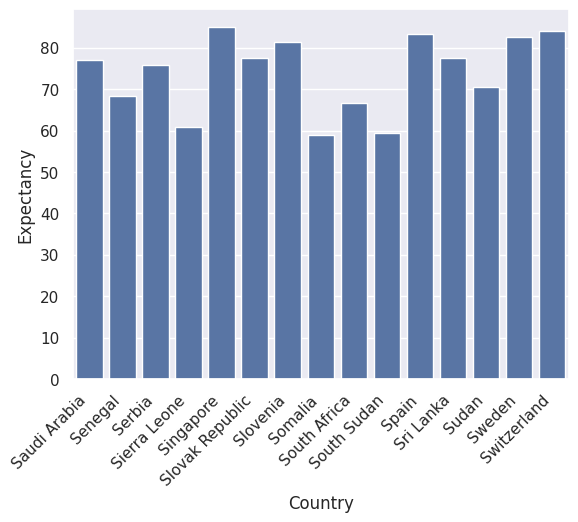

In [22]:
# select one year from the long table
life_exp_sel_2018 = life_exp_sel_long.query('Year==2018')
# create barplot
axes = sns.barplot(data=life_exp_sel_2018, 
                   x='Country', y='Expectancy', color="C0")
# rotate tick labels
axes.set_xticklabels(axes.get_xticklabels(), 
                    rotation=45, 
                    horizontalalignment='right')

axes.figure.savefig('L03b-fig/L03-14.png', bbox_inches='tight')
pass

## Bar graph with sorted columns

Countries are sorted by value in preprocessing, then plotted as before.

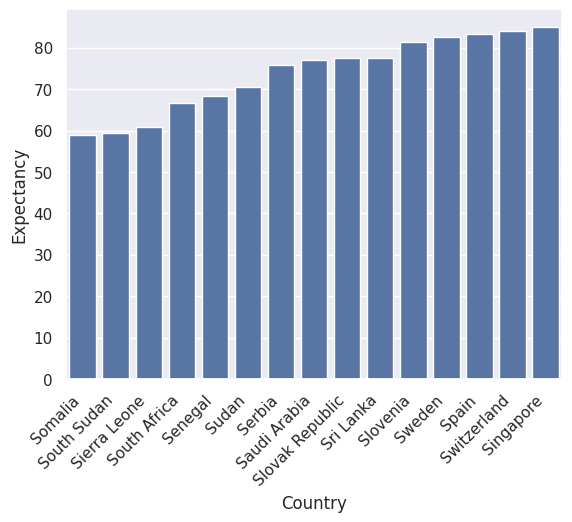

In [23]:
# sorting
life_exp_sel_2018_sorted = life_exp_sel_2018.sort_values('Expectancy')
# plotting
axes = sns.barplot(data=life_exp_sel_2018_sorted, 
                   x='Country', y='Expectancy', color="C0")
axes.set_xticklabels(axes.get_xticklabels(), 
                    rotation=45, 
                    horizontalalignment='right')
axes.figure.savefig('L03b-fig/L03-15.png', bbox_inches='tight')
pass

## Bar graph with multiple colors

* Now we compare life expectancy in two years in a bargraph with tho colors of columns. 
* After selecting appropriate rows of the long table, we use column `Year` in the `hue` parameter of `barplot`.

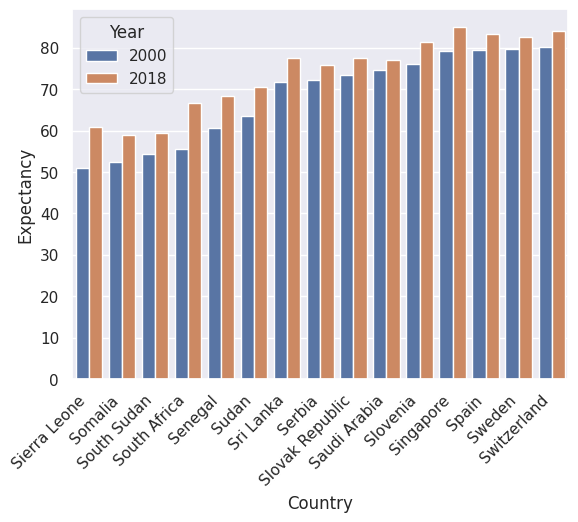

In [24]:
# select only years 2000 and 2018 from the table, sort
life_exp_sel_comp = life_exp_sel_long.query('Year==2018 or Year==2000').sort_values('Expectancy')
# plotting
axes = sns.barplot(data=life_exp_sel_comp, x='Country', y='Expectancy', hue='Year')

axes.set_xticklabels(axes.get_xticklabels(), 
                    rotation=45, 
                    horizontalalignment='right')
axes.figure.savefig('L03b-fig/L03-16.png', bbox_inches='tight')
pass

## Horizontal bar graph

* Longer bar labels are easier to read in a horizontal barplot.
* In Seaborn, it is sufficent to switch `x` and `y` arguments. 

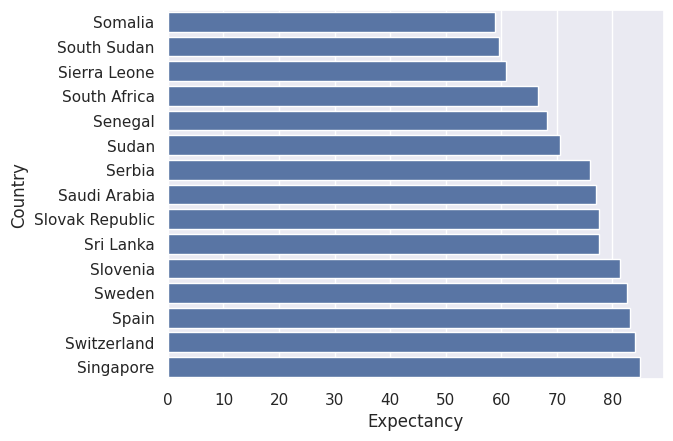

In [25]:
axes = sns.barplot(data=life_exp_sel_2018_sorted, 
                   y='Country', x='Expectancy', color="C0")
axes.figure.savefig('L03b-fig/L03-17.png', bbox_inches='tight')
pass

## Dot plot


* Dot plot shows only the end of each bar as a dot.
* Seaborn's [pointplot](https://seaborn.pydata.org/generated/seaborn.pointplot.html) joins these dots by lines by default, `join=False` prevents this.
* Note that in contrast to barplots, the x axis does not start at 0 (we could make it so by `set_xlim`).

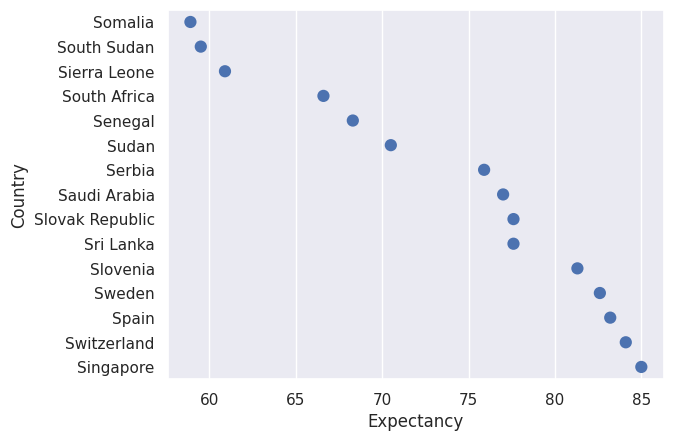

In [26]:
grid = sns.pointplot(data=life_exp_sel_2018_sorted, 
                     y='Country', x='Expectancy', 
                     color="C0", join=False)
grid.figure.savefig('L03b-fig/L03-18.png', bbox_inches='tight')
pass

## Heatmap

* The goal is to create heatmap with countries as rows, several years as columns and life expectancy values as colors. 
* We first need to create a DataFrame with these values in such an arrangment by selecting rows with appropriate years from our long table and pivoting the table by year to make it wide.
* Finally we sort the table by the expectancy in the last year.

In [27]:
# set of years to be used
sel_years={2000, 2005, 2010, 2015, 2018}
# create desired wide table
life_exp_sel_wide = (life_exp_sel_long.query('Year in @sel_years')
                     .pivot(index='Country', columns='Year', values='Expectancy')
                     .sort_values(2018, ascending=False))
# show the table
display(life_exp_sel_wide)


Year             2000  2005  2010  2015  2018
Country                                      
Singapore        79.3  81.1  83.2  84.4  85.0
Switzerland      80.1  81.5  82.5  83.5  84.1
Spain            79.4  80.5  82.0  82.6  83.2
Sweden           79.8  80.6  81.5  82.2  82.6
Slovenia         76.0  77.7  79.5  80.8  81.3
Slovak Republic  73.5  74.3  75.6  76.7  77.6
Sri Lanka        71.6  73.8  74.7  76.9  77.6
Saudi Arabia     74.7  74.7  74.8  76.2  77.0
Serbia           72.1  72.7  74.4  75.1  75.9
Sudan            63.4  65.7  67.7  69.6  70.5
Senegal          60.6  63.4  65.9  67.5  68.3
South Africa     55.6  52.0  56.1  63.4  66.6
Sierra Leone     50.9  52.6  55.4  58.5  60.9
South Sudan      54.4  56.7  57.8  59.4  59.5
Somalia          52.5  54.7  55.0  58.3  58.9

* Heatmap is plotted by [`sns.heatmap`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function.
* We have used options to set the shape of individual cells to square and change the color palette ('cmap').

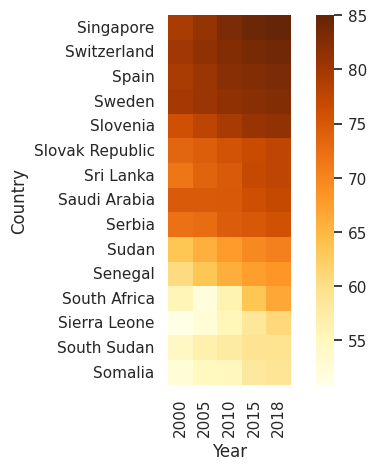

In [28]:
axes = sns.heatmap(data=life_exp_sel_wide, square=True, cmap="YlOrBr")
axes.figure.savefig('L03b-fig/L03-19.png', bbox_inches='tight')
pass

## Pie chart

* To prepare data for pie chart, we use two features of Pandas which we will cover in a later lecture: converting the Income Group column to a categorical type and computing the number of countries in various income groups using `groupby`. 
* In this way we create two Series: `groups` with counts for the whole world and `groups_asia` for just East Asian countries.

In [29]:
# creating a categorical type
income_categories = ["Low income", "Lower middle income",
                     "Upper middle income", "High income"]
cat_type = pd.api.types.CategoricalDtype(categories=income_categories,
                                         ordered=True)
# converting Income Group column to cat_type
countries_cat = countries.astype({'Income Group': cat_type})
# aggregation using groupby
groups = countries_cat.groupby('Income Group').size().rename('Count')
# the same but only on countries selected by query
groups_asia = (countries_cat.query('Region=="East Asia & Pacific"')
               .groupby('Income Group').size().rename('Count'))

display(groups)

Income Group
Low income             29
Lower middle income    50
Upper middle income    56
High income            82
Name: Count, dtype: int64

* The plotting is done by the [`pie`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html) function from Matplotlib.
* It gets the series with counts as parameter `x` and country names as `labels`.

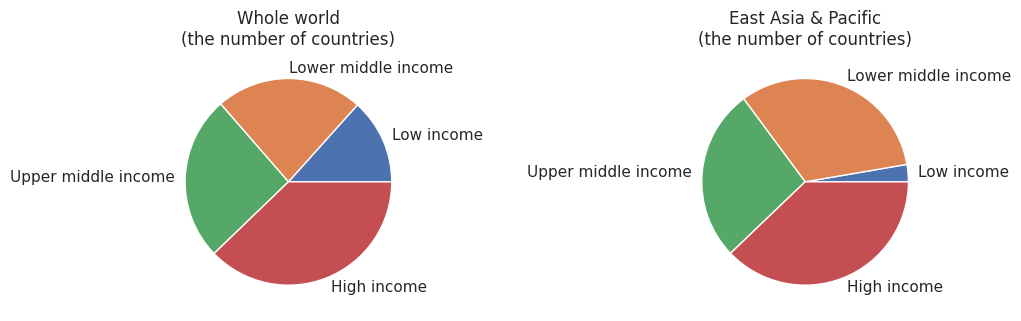

In [30]:
figure, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].pie(x=groups, labels=groups.index)
axes[0].set_title('Whole world\n(the number of countries)')
axes[1].pie(x=groups_asia, labels=groups_asia.index)
axes[1].set_title('East Asia & Pacific\n(the number of countries)')
figure.subplots_adjust(wspace=1)
figure.savefig('L03b-fig/L03-20.png', bbox_inches='tight')
pass

## Pie chart with labels

* Labels are added by `autopct` setting in [`pie`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html). This setting provides a [formatting string](https://docs.python.org/3/tutorial/inputoutput.html#old-string-formatting) for the values, here we print one decimal place.

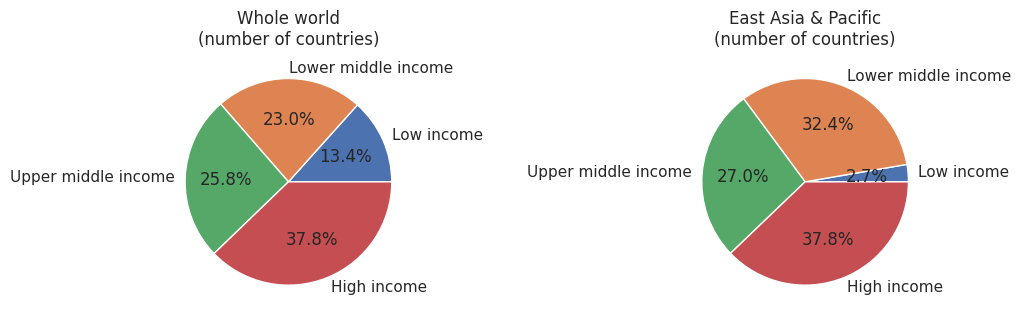

In [31]:
figure, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].pie(x=groups, labels=groups.index, autopct="%.1f%%")
axes[0].set_title('Whole world\n(number of countries)')
axes[1].pie(x=groups_asia, labels=groups_asia.index, autopct="%.1f%%")
axes[1].set_title('East Asia & Pacific\n(number of countries)')
figure.subplots_adjust(wspace=1)
figure.savefig('L03b-fig/L03-21.png', bbox_inches='tight')
pass

## Stacked bar graph instead of pie chart

* To prepare data for stacked bar graph, we need to combine our two count Series (`groups` and `groups_asia`) to one long table `groups_concat`.
* This is a DataFrame, because `Income Group` was moved from index to a column. 
* We also add percentage column, which will be used in the plot. Percentage is computed by divided counts with the sum of all counts.
* We also add a column with region name, because we will consider two regions (East Asia and the whole world).

In [32]:
# first create DataFrame for East Asia
# add Income Group index as a column 
temp_asia = groups_asia.reset_index()
# compute percentages and add as a new column
temp_asia['Percentage'] = temp_asia['Count'] * 100 / temp_asia['Count'].sum()
# add Region as a new column, filled with copies of the same string
temp_asia['Region'] = ["East Asia & Pacific"] * len(groups_asia)

# the same three steps for World
temp_world = groups.reset_index()
temp_world['Percentage'] = temp_world['Count'] * 100 / temp_world['Count'].sum()
temp_world['Region'] = ["World"] * len(groups)

# concatenate two DataFrames and display
groups_concat = pd.concat([temp_asia, temp_world], axis=0)
display(groups_concat)

Income Group  Count  Percentage               Region
0           Low income      1    2.702703  East Asia & Pacific
1  Lower middle income     12   32.432432  East Asia & Pacific
2  Upper middle income     10   27.027027  East Asia & Pacific
3          High income     14   37.837838  East Asia & Pacific
0           Low income     29   13.364055                World
1  Lower middle income     50   23.041475                World
2  Upper middle income     56   25.806452                World
3          High income     82   37.788018                World

* Stacked bar graph is not very automated in Matplotib. 
* Left coordinate for each rectangle needs to be computed manually, then function [`barh`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.barh.html#matplotlib.axes.Axes.barh) is used (see also [tutorial](https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html)).
* Each bar is labeled with the percentage using [`bar_label`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar_label.html#matplotlib.axes.Axes.bar_label) function.

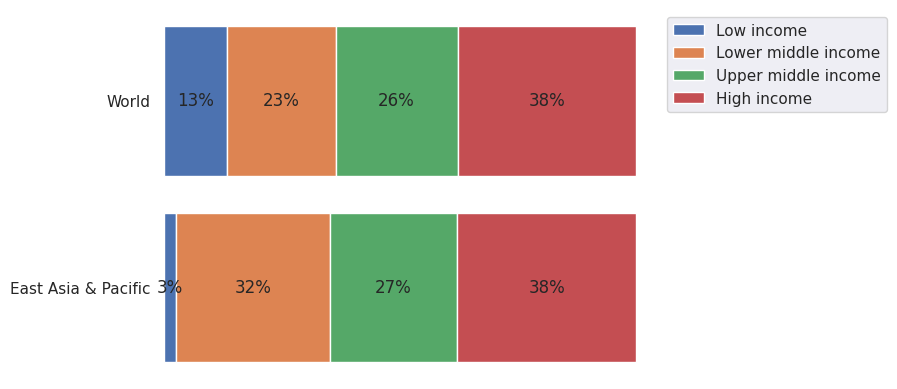

In [33]:
# list of regions and income groups
tmp_regions = groups_concat['Region'].unique()
tmp_groups = groups_concat['Income Group'].unique()
# the first rectangles start at 0
starts = pd.Series([0] * tmp_regions.shape[0])
# create plot
figure, axes = plt.subplots()

# iterate through income groups
for group in tmp_groups:  
    # select data for this income group from both regions
    tmp_data = groups_concat.query("`Income Group` == @group")
    # plot
    rectangles = axes.barh(y=tmp_data['Region'], width=tmp_data['Percentage'], left=starts, label=group)
    # add labels
    axes.bar_label(rectangles, label_type='center', fmt="%.0f%%")
    # move starts by the size of each rectangle
    starts += tmp_data['Percentage'].reset_index(drop=True)  

axes.legend(bbox_to_anchor=(1, 1), loc=2)
# hide plot frame and x-axis ticks
axes.xaxis.set_visible(False)
axes.set_frame_on(False)
  
figure.savefig("L03b-fig/L03-22.png", bbox_inches='tight')
pass

* Stacked bar charts are much easier in Plotly using [`px.bar`](https://plotly.com/python-api-reference/generated/plotly.express.bar) function.

In [34]:
fig = px.bar(groups_concat, x="Region", y="Percentage", color="Income Group", 
             text="Percentage", text_auto=".0f")
fig.show()

## Colored bar graphs insteads of pie chart

* As we have seen before, colored bar graphs are easy in Seaborn from a long table.
* Therefore we use `groups_concat` DataFrame.

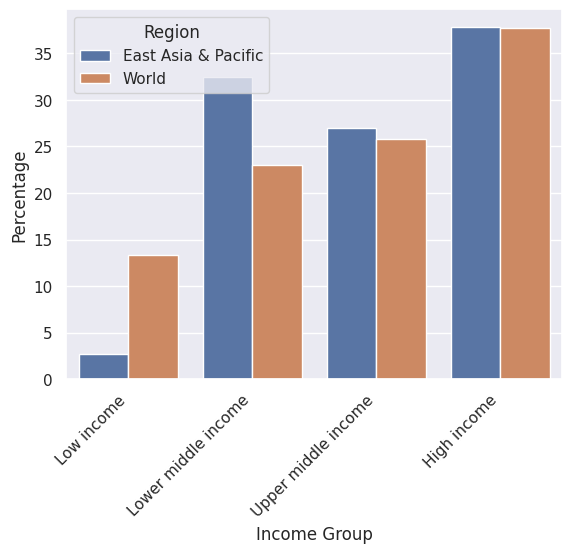

In [35]:
axes = sns.barplot(data=groups_concat, 
                   x='Income Group', y='Percentage', hue='Region')
axes.set_xticklabels(axes.get_xticklabels(), 
                    rotation=45, 
                    horizontalalignment='right')
axes.figure.savefig('L03b-fig/L03-23.png', bbox_inches='tight')

## Multiple bar graphs instead of pie chart

* In the next plot a separte bar graph for each region.
* This is also very simple in Seaborn using [`catplot`](https://seaborn.pydata.org/generated/seaborn.catplot.html) with setting `col='Region'` and `kind='bar'`.
* Labels are rotated in each subplot using a for-loop.

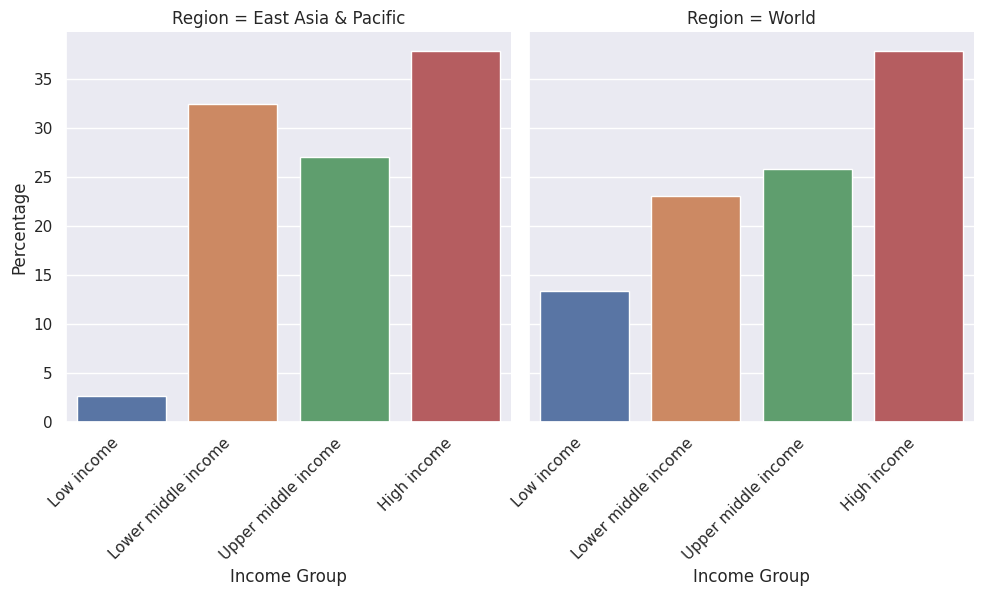

In [36]:
#plotting
grid = sns.catplot(kind='bar', data=groups_concat, 
                   x='Income Group', y='Percentage', col='Region')

# label rotation
for which in [0,1]:
  grid.axes[0,which].set_xticklabels(grid.axes[0,which].get_xticklabels(), 
                      rotation=45, 
                      horizontalalignment='right')

grid.savefig('L03b-fig/L03-24.png', bbox_inches='tight')
pass

## Strip plot

* Strip plot of fertility per region is also very simple in [`sns.catplot`](https://seaborn.pydata.org/generated/seaborn.catplot.html).
* Setting `kind='strip'` is default for `catplot`, so it is omitted her.

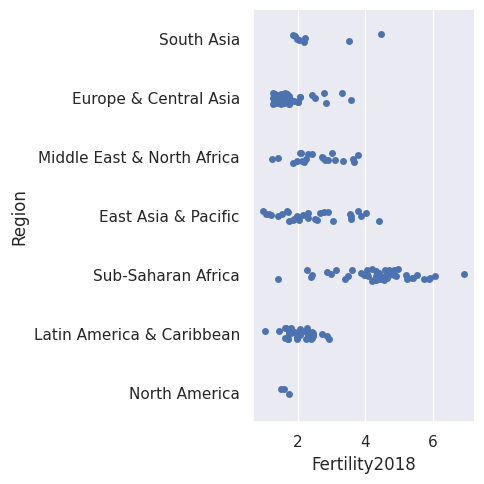

In [37]:
grid = sns.catplot(x="Fertility2018", y="Region", data=countries)
grid.savefig('L03b-fig/L03-25.png', bbox_inches='tight')
pass

## Histogram


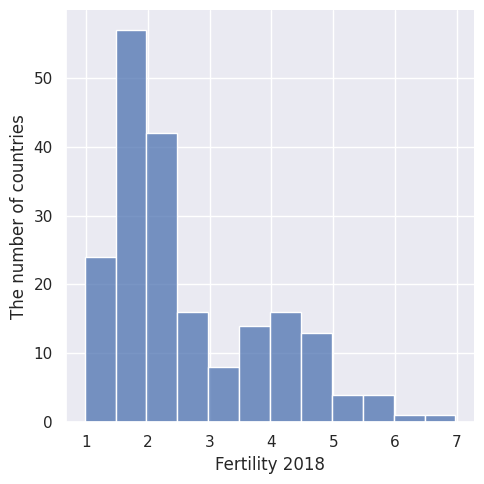

In [38]:
grid = sns.displot(countries, x="Fertility2018", binwidth=0.5)
grid.set_axis_labels("Fertility 2018", "The number of countries")
grid.savefig('L03b-fig/L03-26.png', bbox_inches='tight')
pass

## Parallel coordinates

* We want to display varipus properties of individual countries as parallel coordinate plot.
* We first create table `for_parallel` with selected columns and express all numbers as percentage of the maximum value. 
* We add `selected` column which has True in row for Slovakia and False elsewhere. This is used to highlight Slovakia in the plot. 
* Also ordering is changed to draw Slovakia the last.

In [39]:
# selecting columns
for_parallel_sel = countries.loc[:, ['Population2018', 'Area', 'GDP2018', 
                                     'Expectancy2018', 'Fertility2018']]
# computing maximum in each column
for_parallel_max = for_parallel_sel.max(axis=0)
# dividing values by the maximum and multiplying by 100 to get percentage
for_parallel = for_parallel_sel.div(for_parallel_max, axis=1) * 100
# creating column of booleans called 'selected' which highlights Slovakia with True
for_parallel['selected'] = countries.index=="Slovak Republic"
# sort by 'selected' to put Slovakia last
for_parallel.sort_values('selected', inplace=True)
# show end of the table
display(for_parallel.tail())

Population2018      Area    GDP2018  Expectancy2018  \
Country                                                                
Greenland              0.004023  2.400538  29.312406             NaN   
Grenada                0.008003  0.001989   5.642772       85.223674   
Finland                0.396023  1.979442  26.923070       96.232375   
Zimbabwe               1.036742  2.285380   0.906070       72.049938   
Slovak Republic        0.391086  0.286754  10.443120       90.971484   

                 Fertility2018  selected  
Country                                   
Greenland            28.931000     False  
Grenada              29.842326     False  
Finland              20.396355     False  
Zimbabwe             52.292782     False  
Slovak Republic      22.276870      True

* Parallel coordinates are drawn using Pandas [`parallel_coordinates`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.parallel_coordinates.html) function, which internally calls Matplotlib and returns Axes object.

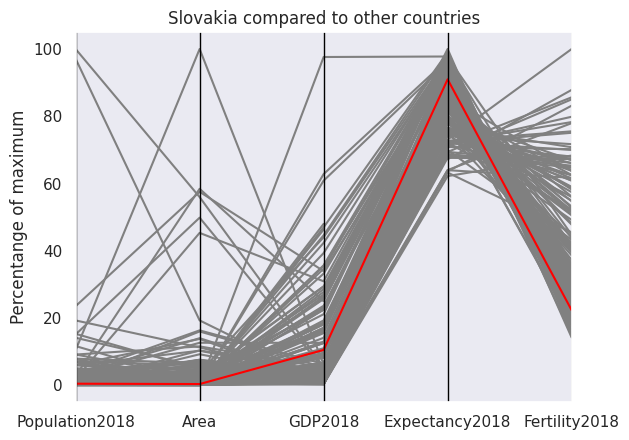

In [40]:
axes = pd.plotting.parallel_coordinates(for_parallel, class_column='selected', 
                                        color=['gray', 'red'])
axes.get_legend().remove()
axes.set_ylabel("Percentange of maximum")
axes.set_title("Slovakia compared to other countries")
axes.figure.savefig('L03b-fig/L03-27.png', bbox_inches='tight')
pass

## Parallel categories

* We will use two categorical columns from the countries table, but more categorical columns could be easily added.
* We use the version of the table with a categorical income groups and sort countries by income. 
* Now we use [`parallel-categories`](https://plotly.com/python/parallel-categories-diagram/) function from Plotly.
* This function orders each column of the figure by size. By calling `update_traces`, we reorder the first column by the same order as they first occur in our table.

In [41]:
for_parallel_cat = (countries_cat.loc[:,['Income Group','Region']]
                     .sort_values('Income Group', ascending=False))
fig = px.parallel_categories(for_parallel_cat, width=800)
fig.update_traces(dimensions=[{"categoryorder": "array"}, {}])
fig.update_layout(font_size=20)
fig.update_layout(margin={'l':200,'r':200})
fig.show()
fig.write_image("L03b-fig/L03-28.png")

## Radar chart

* Radar charts are not well supported in any of the used libraries.
* Below we compute angles of each axis manually, then use `plot` from Matplotlib.
* When creating axes, we specify polar coordinates `subplot_kw={'projection': 'polar'}`. 
* We also use [`set_thetagrids`](https://matplotlib.org/stable/api/projections/polar.html#matplotlib.projections.polar.PolarAxes.set_thetagrids)

Population2018       Area    GDP2018  Expectancy2018  \
Country                                                               
India               97.119853  19.225705   1.079413       81.729202   
China              100.000000  55.929174   5.368740       90.309968   
United States       23.456628  57.500095  33.900234       92.470494   

               Fertility2018  
Country                       
India              32.142341  
China              24.446695  
United States      25.018082

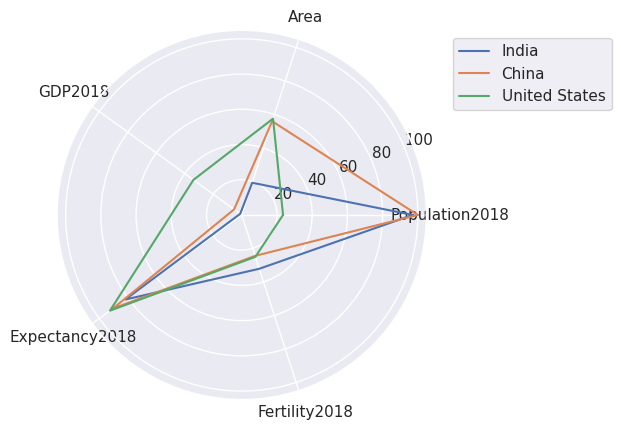

In [42]:
# skip 'selected' column, use only 3 countries
for_radar = for_parallel.loc[['India','China','United States'], :].iloc[:, 0:-1]  
display(for_radar.head())

# setup plot with polar coordinates
figure, axes = plt.subplots(subplot_kw={'projection': 'polar'})
categories = list(for_radar.columns)
import math
angles = [ i * 2 * math.pi / len(categories) for i in range(len(categories))]
angles_deg = [x / math.pi * 180 for x in angles]    
axes.set_thetagrids(angles_deg, labels=categories)

# for plotting, we will need to return to starting point in each line
angles.append(angles[0])

# for each country create list of values, add the starting point, plot
for country in for_radar.index:
    values = list(for_radar.loc[country, :])
    values.append(values[0])
    axes.plot(angles, values, label=country)

axes.legend(bbox_to_anchor=(1.05, 1), loc=2)
figure.savefig('L03b-fig/L03-30.png', bbox_inches='tight')
pass

In [43]:
! rm L03b_figures.zip
! zip L03b_figures L03b-fig/*.png

  adding: L03b-fig/L03-01.png (deflated 9%)
  adding: L03b-fig/L03-02.png (deflated 9%)
  adding: L03b-fig/L03-03.png (deflated 8%)
  adding: L03b-fig/L03-04.png (deflated 5%)
  adding: L03b-fig/L03-05.png (deflated 3%)
  adding: L03b-fig/L03-06.png (deflated 7%)
  adding: L03b-fig/L03-07.png (deflated 6%)
  adding: L03b-fig/L03-08.png (deflated 7%)
  adding: L03b-fig/L03-09.png (deflated 4%)
  adding: L03b-fig/L03-10.png (deflated 10%)
  adding: L03b-fig/L03-11.png (deflated 3%)
  adding: L03b-fig/L03-12.png (deflated 3%)
  adding: L03b-fig/L03-13.png (deflated 8%)
  adding: L03b-fig/L03-14.png (deflated 13%)
  adding: L03b-fig/L03-15.png (deflated 13%)
  adding: L03b-fig/L03-16.png (deflated 12%)
  adding: L03b-fig/L03-17.png (deflated 19%)
  adding: L03b-fig/L03-18.png (deflated 16%)
  adding: L03b-fig/L03-19.png (deflated 14%)
  adding: L03b-fig/L03-20.png (deflated 7%)
  adding: L03b-fig/L03-21.png (deflated 5%)
  adding: L03b-fig/L03-22.png (deflated 13%)
  adding: L03b-fig/L03-2